In [2]:
# `setup.jl` will load core packages including the ED package
include("./src/setup.jl")

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/newberry/.julia/packages/PyPlot/XHEG0/src/init.jl:192


⊗ (generic function with 1 method)

In [5]:
print_symbols()

id, σx, σy, σz, ⊗(x,y)


Other sources:
- https://arxiv.org/pdf/cond-mat/0010440.pdf
- http://albi3ro.github.io/M4/Spin-Chain-Prerequisites.html
- https://aip.scitation.org/doi/10.1063/10.0004234?af=R&feed=most-recent
- https://crangi.github.io/post/kitaev_chain/
- maybe?: https://iopscience.iop.org/article/10.1088/1367-2630/12/8/083039/pdf
- maybe?: https://pastel.archives-ouvertes.fr/tel-01651575/document
- https://static1.squarespace.com/static/586edee91b10e34d8b31d4b7/t/5f86257e595c1b3c7ca66c29/1602626947935/2017+Long+coherence+times+for.pdf
- https://d-nb.info/1107983169/34
- https://arxiv.org/pdf/cond-mat/0506438.pdf

# Majorana intro (old)

Majorana Fermion Properties:

A majorana fermion operator is its own complex conjugate $\hat{c}=\hat{c}^\dagger$ and $\hat{c}^2=1$

# Majorana intro (old)

Majorana Fermion Properties:
- 

This notebook walks through the process of operating in the majorana basis. Majorana particles are defined as particles that are their own antiparticle. In the language of second quantization, this is simply the statement that creating the particle, and annihilating it should be done with the same operator.

I'll open with a quick Majorana intro, considering the Hamiltonian: $H=-\frac{1}{2m} \frac{\partial^2}{\partial x^2} - V \delta(x)$ with associated raising and lowering operatrs $c^\dagger$ and $c$ respectively.

We can fabricate operators $\gamma_+=c+c^\dagger$, $\gamma_-=-i(c-c^\dagger)$ that satisfy the majorana condition $\gamma_\pm = \gamma_pm^\dagger$, each of the operators square to one, and you can construct a number operator from them $n = c^\dagger c = 0.5(i \gamma_+ \gamma_- + 1)$.

https://www.theorie.physik.uni-muenchen.de/activities/schools/archiv/asc_school_15/refael_notes.pdf

# Jordan Wigner Transformation (Ising)

All of this in the context of the Ising model's Hamiltonian:

$$ H = -J g \sum_i \hat{\sigma}_i^x - J \sum_{<i,j>} \hat{\sigma}_i^z \hat{\sigma}_j^z $$

Due to the interaction term spin tensor product, the Hilbert space will double in size for each link in the 1D chain!

Starting out defining raising and lowering operators for the Ising chain as an example:

$$ \hat{\sigma}_i^\pm = \frac{1}{2} (\hat{\sigma}_i^x \pm i \hat{\sigma}_i^y) $$

Which satisfies the anti-commutation relations: $\{ \sigma_i^-, \sigma_i^+ \} = 1$, $\{\sigma_i^-, \sigma_i^-\} = \{\sigma_i^+, \sigma_i^+\} = 0 $

And just for fun we can construct the number operator $n_l = c_l^\dagger c_l$.

The Jordan-Wigner transformation can be applied, recovering the true fermion anticommutation relations from the spin operators. (otherwise, interpretting the raising and lowering operators as creation and anhiliation operators are interpretted as being bosonic as they commute at different sites $[\sigma_i^+,\sigma_j^-] = 0, j \neq i$, while fermionic operators anticommute at different sites). 

This Jordan-Wigner transformation is as follows:

$$ c_i = \Pi_{j<i} (\hat{\sigma}_j^z) \hat{\sigma}_i^+ $$
$$ c_i^\dagger = \Pi_{j<i} (\hat{\sigma}_j^z) \hat{\sigma}_i^- $$

These fermionic operators are non-local. The spin operator is only defined at a point (local), whie the fermionic operator depends on the spin values along a whole line, from the left boundary to the given location.

The Jordan-Wigner transformation is also reversible for this system via:

$$ \hat{\sigma}_i^+ = \Pi_{j<i} (1 - 2 c_j^\dagger c_j) c_i $$
$$ \hat{\sigma}_i^- = \Pi_{j<i} (1 - 2 c_j^\dagger c_j) c_i^\dagger $$

"the quantum Ising ring can be solved by first performing the Jordan-Wigner transformations that convert the spin operators into spinless fermions, followed by a Fourier transform which maps the such obtained quadratic fermion model into a free fermion model in the momentum space." - https://arxiv.org/pdf/2001.00511.pdf

the Jordan-Wigner transformation represents a system of N spins-1/2 with the 2N-dimensional Hilbert space in terms of N fermions with the 2N-dimensional Fock space. Each J-W transformation is expressed in terms of two Majorana fermions.

# Review

Reviewing https://aip.scitation.org/doi/pdf/10.1063/10.0004234.

Working with the following XYZ spin chain Hamiltonian.

$$ H = H_{xx} + H_{yy} + H_{zz} + H_z $$

$$ H = \sum\limits_{i}^{L} [J (\frac{1+\gamma}{2})σ^{x}_{i}σ^{x}_{i+1} + J (\frac{1-\gamma}{2})σ^{y}_{i}σ^{y}_{i+1} + J_z σ^{z}_{i}σ^{z}_{i+1} + g σ^{z}_{i}] $$

The Hamiltonian can be rewritten in terms of creation operators at the jth site ($a^\dagger_j$), anhiliation ($a_j$), and $n_j = a^\dagger_j a_j$, and the parameters defined as $-t\pm \triangle = J \frac{1 \pm \gamma}{2}$ where t is the "hopping integral" and the pairing amplitude $\triangle=|\triangle|e^{i\theta}$

$$ H = \sum\limits_{i}^{L-1} [ 2g(n_j-\frac{1}{2}) - (t a^\dagger_j a_{j+1} - \triangle a_j a_{j+1} + h.c.) + 2J_z(n_j-\frac{1}{2})(n_{j+1}-\frac{1}{2}) ] $$

And writing the same Hamiltonian in the Majorana representation:

$$ H = \frac{i}{2} \sum_{j=1}^{L-1} (-\mu c_{2j-1}c_{2j} + (t+|\triangle|)c_{2j}c_{2j+1} + (-t+|\triangle|)c_{2j-1}c_{2j+2} + \frac{i V}{2}c_{2j-1}c_{2j}c_{2j+1}c_{2j+2}) $$

# Kitaev Chain

We are working with the Hamiltonian for the Kitaev chain, written below. It is a simplification of the hamiltonian used throughout the codebase in which the parameter $J_z=0, \gamma \neq 0$.

$$ H = H_{xx} + H_{yy} + H_z $$

$$ H = \sum\limits_{i}^{L} [J (\frac{1+\gamma}{2})σ^{x}_{i}σ^{x}_{i+1} + J (\frac{1-\gamma}{2})σ^{y}_{i}σ^{y}_{i+1} + g σ^{z}_{i}] $$


The same Hamiltonian written in the Majorana basis can be constructed after a Jordan-Wigner transformation.

Map the problem to Majorana fermions:

$$ a_{2l-1} = \Pi_{j=1}^{l-1} \sigma_j^z \sigma_l^x $$

$$ a_{2l} = \Pi_{j=1}^{l-1} \sigma_j^z \sigma_l^y $$

where l = 1, 2, ..., L.

Now say $$\vec{a} = (a_1, a_2, ..., a_{2L})$$

# Strong Zero Mode

Strong zero mode is denoted as $\psi_0$. Strong zero mode properties:
- Commutes with the Hamiltonian in the thermodynamic limit enabling stability. $[\psi_0,H]=0$
- Anticommutes with a discrete symmetry of the Hamiltonian. (example \mathbb{Z}_2) ${\psi_0,D}=0$
- Exists as a local operator with the property $\psi_0^2=O(1)$

The presence of a SZM implies the spectrum of H is doubly degenerate where the degenerate pairs are $\{|n_0>,\psi_0|n>\}$.

After a Jordan-Wigner transformation, the strong zero mode can be constructed as a sum over majorana fermion terms.

$$ \psi_0 = \sum_{j=0}^L (\frac{\Gamma}{J})^j \sigma_j^z \Pi_{k=1}^{j-1} \sigma_k^x $$

$$ [\psi_0,H] = -i \frac{d}{dt}\psi_0 = 2 i \Gamma \sigma_1^x $$

Under Floquet driving there exists another kind of edge mode denoted as a $\pi$ edge mode.


# Current

$$ H = \sum\limits_{i}^{L} [J (\frac{1+\gamma}{2})σ^{x}_{i}σ^{x}_{i+1} + J (\frac{1-\gamma}{2})σ^{y}_{i}σ^{y}_{i+1} + g σ^{z}_{i}] $$

Map the problem to Majorana fermions:

$$ a_{2l-1} = \Pi_{j=1}^{l-1} \sigma_j^z \sigma_l^x $$

$$ a_{2l} = \Pi_{j=1}^{l-1} \sigma_j^z \sigma_l^y $$

Computing:

$$A = Tr(e^{iHt} a_1 e^{-iHt} a_1) = Tr(U^\dagger (U e^{iHt} U^\dagger) (U a_1 U^\dagger) (U e^{-iHt} U^\dagger) U a_1)$$

Where $(U e^{iHt} U^\dagger)$ diagonalizes the Hamiltonian.

# Mapping to Free Fermions

Using a Jordan-Wigner transformation, we will transform a Hamiltonian from an interacting spin basis (transverse Ising model in this case) to a non-interacting fermionic basis. (Hamiltonian corresponds to our model $jz=0, \gamma=1, j=1$)

$$H = -\sum_{j=1}^{L} \sigma_j^x \sigma_{j+1}^x + h_z \sum_j^L \sigma_j^z$$

Define the new fermionic operators build from the Pauli operators:

$$n_k = \sigma_k^+ \sigma_k^- = c_k^\dagger c_k$$
$$c_j^\dagger = \sum_{k=1}^{j-1} (1-2n_k) \cdot \sigma_j^+$$
$$c_j = \sum_{k=1}^{j-1} (1-2n_k) \cdot \sigma_j^-$$
$$\sigma_j^z = 2 \sigma_j^+ \sigma_j^- -1$$

The operator $n_k$ is the occupation number operator and either returns 1 if site k is occupied or 0 if not.

Redefine H in terms of the new operators:

$$H= -\sum_j (c_j^\dagger - c_j)(c_{j+1}^\dagger + c_{j+1}) + 2h_z \sum_i c_i^\dagger c_i + const.$$

We are working in a translationally invariant system (discretely), this is always an indicator to do a Fourier Transform to exploit the symmetry.

$$c_j = \frac{1}{\sqrt{N}} \sum_k e^{ikj}c_k$$
$$c_j^\dagger = \frac{1}{\sqrt{N}} \sum_k e^{-ikj}c_k^\dagger$$
$$H=-\sum_k c_k^\dagger c_k (2Cos(k)) - \sum_k (c_k^\dagger c_{-k}^\dagger e^{ik} + c_k c_{-k} e^{-ik}) + 2h_z \sum_k c_k^\dagger c_k$$

We rewrite the Hamiltonian as two sums of half the typical value like so:

$$
H = \sum_k \begin{pmatrix}
c_k^\dagger & c_{-k}\\
\end{pmatrix}
\begin{pmatrix}
-cos(k)+h_z & -i sin(k)\\
i sin(k) & cos(k)-h_z
\end{pmatrix}
\begin{pmatrix}
c_k\\
c_{-k}^\dagger
\end{pmatrix}
$$

We can diagonalize the kernel matrix and find the eigenvalues of the Hamiltonian, finding it gives two bands.

$$E_\pm = \pm \sqrt{1+h_z^2-2h_z cos(k)}, k=\frac{2\pi m}{L}, m=0,1,2,...,L-1$$

Since the Hamiltonian is diagonalisable, it shows that the initial 1D Ising model of spins can be completely described by free fermions filling the energy levels above.

- https://theory.leeds.ac.uk/interaction-distance/applications/ising/map-to-free/

# Kitaev's Paper

https://arxiv.org/pdf/cond-mat/0010440.pdf
https://arxiv.org/pdf/cond-mat/0506438.pdf

anhiliation & creation operators $a_j, a_j^\dagger, (j=1,...,N)$. Construct the Majorana Operators from them:

$$c_{2j-1}=a_j + a_j^\dagger$$
$$c_{2j}=\frac{a_j - a_j^\dagger}{i}$$

Constructing the Hamiltonian (corresponding to our $J_z=g=0$):

$$H=\frac{i}{4} \sum_{j,k}\hat{A}_{jk} c_j c_k$$

# Process

Reviewing https://arxiv.org/pdf/2002.00098.pdf.

Working with the following XYZ spin chain Hamiltonian.

$$ H = H_{xx} + H_{yy} + H_{zz} + H_z $$

$$ H = \sum\limits_{i}^{L} [J (\frac{1+\gamma}{2})σ^{x}_{i}σ^{x}_{i+1} + J (\frac{1-\gamma}{2})σ^{y}_{i}σ^{y}_{i+1} + J_z σ^{z}_{i}σ^{z}_{i+1} + g σ^{z}_{i}] $$

We consider the case where $J_z=0$, such that $H_{zz}=0$.

Map the problem to Majorana fermions:

$$ a_{2l-1} = \sigma_l^x \Pi_{j=1}^{l-1} \sigma_j^z $$

$$ a_{2l} = \sigma_l^y \Pi_{j=1}^{l-1} \sigma_j^z $$

Allowing us to write the hamiltonian in terms of the majorana operators:

$$H=i\sum_{i=1}^L [ -\frac{1+\gamma}{2}a_{2l}a_{2l+1} + \frac{1-\gamma}{2}a_{2l-1}a_{2l+2} - g a_{2l-1}a_{2l} ]$$

(?We take $a_{2l+1}=a_{2l+2}=0$ ensuring $\sigma_{L+1}^{x,y}$ is out of the system?) Also we can construct $\psi_k$ such that $\psi_k |0>=|k>$ with energy spectrum $E_k=\pm2 \sqrt{(g+cosk)^2+\gamma^2 sin^2k}$.

Computing:

$$A = Tr[e^{iHt} a_1 e^{-iHt} a_1] = Tr[U^\dagger (U e^{iHt} U^\dagger) (U a_1 U^\dagger) (U e^{-iHt} U^\dagger) U a_1]$$

Where $(U e^{iHt} U^\dagger)$ diagonalizes the Hamiltonian.

In [179]:
function get_σix(L::Int64, i::Int64)
    ops = fill(id, L)
    ops[end-i+1] = σx
    return foldl(⊗, ops)
end

function get_σiy(L::Int64, i::Int64)
    ops = fill(id, L)
    ops[end-i+1] = σy
    return foldl(⊗, ops)
end

function get_σiz(L::Int64, i::Int64)
    ops = fill(id, L)
    ops[end-i+1] = σz
    return foldl(⊗, ops)
end

function get_majorana_a_l(L::Int64, l::Int64)
    """
    Returns the lth majorana state
    """
    if l%2==0 # l even
        a = get_σiz(L, 1)
        for j in 2:l-1
            a = a * get_σiz(L, j)
        end
        a = get_σix(L, l) * a
    else # l odd
        a = get_σiz(L, 1)
        for j in 2:l-1
            a = a * get_σiz(L, j)
        end
        a = get_σiy(L, l) * a
    end
    
    return a
    
end

function get_majorana_a_2lm1(L::Int64, l::Int64)
    """
    Returns the lth majorana state
    """
    a = get_σiz(L, 1)
    for j in 2:l-1
        a = a * get_σiz(L, j)
    end
    a = get_σiy(L, l) * a
    
    return a
    
end

get_majorana_a_2lm1 (generic function with 1 method)

$$ a_{2l-1} = \sigma_l^x \Pi_{j=1}^{l-1} \sigma_j^z $$

$$ a_{2l} = \sigma_l^y \Pi_{j=1}^{l-1} \sigma_j^z $$

In [106]:
function get_Cl(l, g, 𝛾)
    qplus = (g+sqrt(Complex(g^2+𝛾^2-1)))/(1+𝛾)
    qminus = (g-sqrt(Complex(g^2+𝛾^2-1)))/(1+𝛾)
    return ( ((1+𝛾)/2)/sqrt(Complex(g^2+𝛾^2-1)) ) * (qplus^l - qminus^l)
end

function get_SM(L, l, g, 𝛾)
    psi0 = get_Cl(1, g, 𝛾) .* get_majorana_a_2lm1(L, 1)
    for l in 2:L-1
        Cl = get_Cl(l, g, 𝛾)
        a_l = get_majorana_a_2lm1(L, l)
        psi0 += Cl .* a_l
    end
    return psi0
end

get_SM (generic function with 1 method)

In [113]:
L=4
ED.majorana(L,1) == get_σix(L,1)

true

In [171]:
ED.majorana(2,1)

4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [176]:
psi0 = ED.majorana(2,1)
u, v = eigen( psi0 )
# (v' psi0 v)  diagonalizes psi0
v' * psi0 * v

4×4 Matrix{Float64}:
 -1.0           0.0          3.3639e-16  0.0
  0.0          -1.0          0.0         3.3639e-16
  3.10696e-16   0.0          1.0         0.0
  0.0           3.10696e-16  0.0         1.0

In [245]:
function get_Ainf_AN_2(L::Int64,g::Float64,jx::Float64,jz::Float64, 
        gamma::Float64,times::AbstractArray)
    #=
    Partially optimized. Refactored from Daniel Yates' code
    =#
    H = GetHamiltonian(L,g,gamma,jx,jz)
    
    ainfs = zeros(Complex{Float64}, length(times))
    
    
    H_vals, H_vecs = eigen(H)
    
    a1 = get_majorana_a_l(L,L)
    a1_vals, a1_vecs = eigen(a1)
    
    H_d = H_vecs' * H * H_vecs
    a1_d = a1_vecs' * a1 * a1_vecs
    
    a1V = H_vecs'*a1*H_vecs
    for ti in 1:length(times)
        U = Diagonal(exp.(-im*times[ti].*H_vals))
        ainfs[ti] = 1/(2^L)*tr(U'*a1V*U*a1V)
    end
    return real.(ainfs)
    
#     sigxV = vecs'*sigx*vecs
#     for ti in 1:length(times)
#         U = Diagonal(exp.(-im*times[ti].*vals))
#         ainfs[ti] = 1/(2^L)*tr(U'*sigxV*U*sigxV)
#     end
#     return real.(ainfs)
end

L=8
g=0.0
jx=1.0
jz=0.0
gamma=0.0

Ainf = get_Ainf_AN(L, g, jx, jz, gamma, t_list);
Ainf2 = get_Ainf_AN_2(L, g, jx, jz, gamma, t_list);

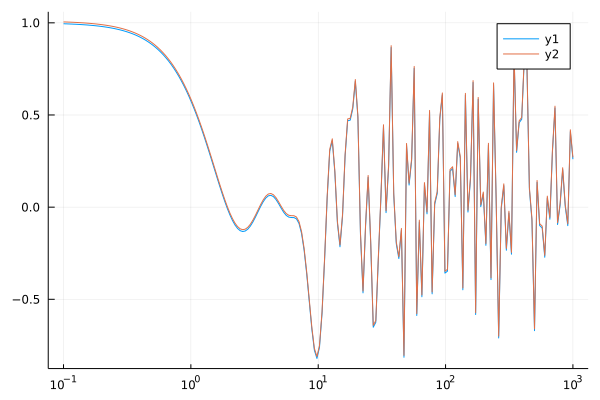

In [254]:
Plots.plot( t_list, [Ainf,Ainf2.+0.01], xaxis=:log )

In [214]:
H0 = GetHamiltonian(L,g,gamma,jx,jz)
sig0 = get_σix(L, 1)

4×4 Matrix{Complex{Int64}}:
 0+0im  1+0im  0+0im  0+0im
 1+0im  0+0im  0+0im  0+0im
 0+0im  0+0im  0+0im  1+0im
 0+0im  0+0im  1+0im  0+0im

In [215]:
commute(H0,sig0)

4×4 Matrix{ComplexF64}:
  0.0+0.0im  0.0+0.0im  1.0+0.0im   0.0+0.0im
  0.0+0.0im  0.0+0.0im  0.0+0.0im  -1.0+0.0im
 -1.0+0.0im  0.0+0.0im  0.0+0.0im   0.0+0.0im
  0.0+0.0im  1.0+0.0im  0.0+0.0im   0.0+0.0im

In [ ]:
H0*

In [137]:
L = 5
jx = 1.0
jz = 0.0
g = 0.5

curr_H = ED.H(L,jx,jz,g);
curr_psi0 = ED.Psi0(L,g);

res = (commute(curr_H, curr_psi0) / (2*im)) * inv(get_σiy(L,1))
us, vs = eigen(res)
# Gamma = abs(real(us[1]*im))
# if Gamma != abs(real(us[2]*im))
#     println("Problem")
# end

println(Gamma)

Problem
0.0270765180536941


In [24]:
function get_Ainf_M(L::Int64,g::Float64,times::AbstractArray)
    #=
    Partially optimized. Refactored from Daniel Yates' code
    =#
    gamma = 0.0
    jx = 1.0
    jz = 0.0
    H = ED.H_Delta(L, jx, jz, g, gamma)
    
    psi0 = ED.Psi0(L, g)
#     majorana_i = ED.majorana(L, i)
    
    ainfs = zeros(Complex{Float64}, length(times))
    
    sig1x = get_σix(L, 1)
    
    vals, vecs = eigen(H)
    
    H_d = zeros( size(H) )
    for i in 1:size(vals)[1]
        H_d[i,i] = vals[i]
    end
    
    sigxV = vecs'*sig1x*vecs
    for ti in 1:length(times)
        print("ed: ti = $ti\r")
        U = Diagonal(exp.(-im*times[ti].*vals))
        ainfs[ti] = 1/(2^L)*tr(U'*sigxV*U*sigxV)
    end
    return real.(ainfs)
end

get_Ainf_M (generic function with 1 method)

In [28]:
t_list = 10.0 .^(range(-1,stop=3,length=200));
Ainf = get_Ainf_M(4, 0.5, t_list);

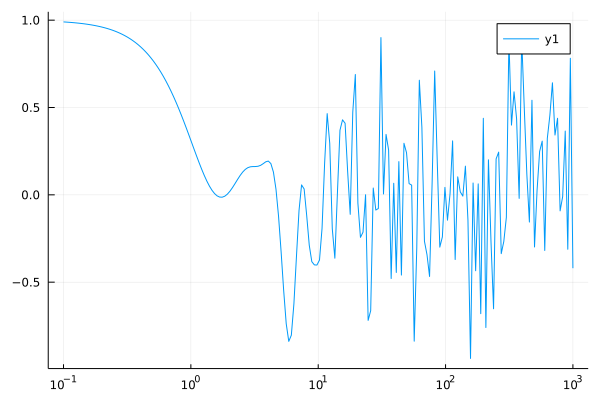

In [32]:
Plots.plot(t_list, Ainf, xaxis=:log)

In [4]:
ED.Psi0(3,0.5)

8×8 Matrix{Float64}:
 0.0        0.872872   0.436436  …   0.0        0.0        0.0
 0.872872   0.0        0.0          -0.218218   0.0        0.0
 0.436436   0.0        0.0           0.0       -0.218218   0.0
 0.0       -0.436436   0.872872      0.0        0.0        0.218218
 0.218218   0.0        0.0           0.872872   0.436436   0.0
 0.0       -0.218218   0.0       …   0.0        0.0       -0.436436
 0.0        0.0       -0.218218      0.0        0.0        0.872872
 0.0        0.0        0.0          -0.436436   0.872872   0.0

In [8]:
function get_U(L::Int64, jx::Float64, g::Float64, gamma::Float64, T::Float64)
    return exp.( -im * T/2 * 
            ( ED.Hxx(L, jx*(1+gamma)/2) + 
            ED.Hyy(L, jx*(1-gamma)/2) + 
            g * ED.Hz(L, jx*(1+gamma)/2) ) 
        )
end

get_majorana_a_l (generic function with 1 method)

In [210]:
"""
Binary `BitArray` representation of the given integer `num`, padded to length `N`.
"""
bit_rep(num::Integer, N::Integer) = BitArray(parse(Bool, i) for i in string(num, base=2, pad=N))

"""
    generate_basis(N::Integer) -> basis

Generates a basis (`Vector{BitArray}`) spanning the Hilbert space of `N` spins.
"""
function generate_basis(N::Integer)
    nstates = 2^N
    basis = Vector{BitArray{1}}(undef, nstates)
    for i in 0:nstates-1
        basis[i+1] = bit_rep(i, N)
    end
    return basis
end

function GetHamiltonian(N::Int64,g::Float64,𝛾::Float64,J::Float64,Jz::Float64)
    if N>12
        return nothing
    end
    
    # vector of operators: [σx, σx, id, ...]
    first_term_ops = fill(id, N)
    first_term_ops[1] = σx
    first_term_ops[2] = σx
    
    # vector of operators: [σy, σy, id, ...]
    second_term_ops = fill(id, N)
    second_term_ops[1] = σy
    second_term_ops[2] = σy
    
    # vector of operators: [σz, σz, id, ...]
    third_term_ops = fill(id, N)
    third_term_ops[1] = σz
    third_term_ops[2] = σz
    
    # vector of operators: [σz, id, ...]
    fourth_term_ops = fill(id, N)
    fourth_term_ops[1] = σz
    
    H = zeros(Int, 2^N, 2^N)
    # Term 1
    for i in 1:N-1
        # tensor multiply all operators
        H -= J*((1+𝛾)/2) * foldl(⊗, first_term_ops)
        # cyclic shift the operators
        first_term_ops = circshift(first_term_ops,1)
    end
        
    # Term 2
    for i in 1:N-1
        # tensor multiply all operators
        H -= J*((1-𝛾)/2) * foldl(⊗, second_term_ops)
        # cyclic shift the operators
        second_term_ops = circshift(second_term_ops,1)
    end
        
    # Term 3
    for i in 1:N-1
        # tensor multiply all operators
        H -= Jz * foldl(⊗, third_term_ops)
        # cyclic shift the operators
        third_term_ops = circshift(third_term_ops,1)
    end
        
    # Term 4 (only non-interaction term)
    for i in 1:N
        H -= g * foldl(⊗, fourth_term_ops)
        fourth_term_ops = circshift(fourth_term_ops,1)
    end
    
    return H
end

function get_Ainf_AN(L::Int64,g::Float64,jx::Float64,jz::Float64, 
        gamma::Float64,times::AbstractArray)
    #=
    Partially optimized. Refactored from Daniel Yates' code
    =#
    H = GetHamiltonian(L,g,gamma,jx,jz)
    
    ainfs = zeros(Complex{Float64}, length(times))
    
    sigx = get_σix(L, 1)
    
    vals, vecs = eigen(H)
    
    H_d = vecs' * H * vecs
#     H_d = zeros( size(H) )
#     for i in 1:size(vals)[1]
#         H_d[i,i] = vals[i]
#     end
    
    sigxV = vecs'*sigx*vecs
    for ti in 1:length(times)
        print("ed: ti = $ti\r")
        U = Diagonal(exp.(-im*times[ti].*vals))
        ainfs[ti] = 1/(2^L)*tr(U'*sigxV*U*sigxV)
    end
    return real.(ainfs)
end

get_Ainf_AN (generic function with 1 method)

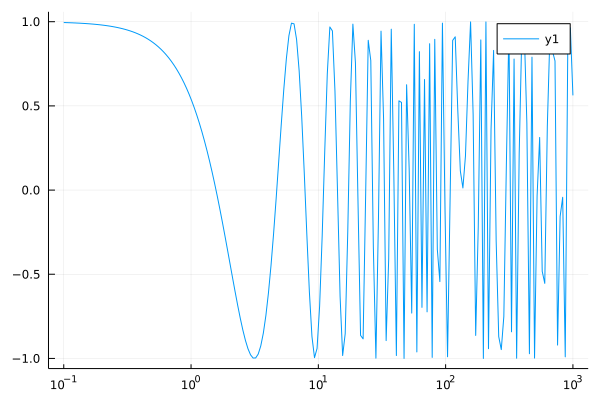

In [212]:
t_list = 10.0 .^(range(-1,stop=3,length=200))
L=2
g=0.0
jx=1.0
jz=0.0
gamma=0.0

Ainf = get_Ainf_AN(L, g, jx, jz, gamma, t_list);
Plots.plot(t_list, Ainf, xaxis=:log )